# Import Dependencies

In [82]:
# Update sklearn to prevent version mismatches
#!pip install sklearn --upgrade

In [83]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
#!pip install joblib

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV and Perform Basic Data Cleaning

The complete dataset is comprised of one label(`koi_disposition`) and several features together with their uncertainities.

In [85]:
df = pd.read_csv("data/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


The label `koi_disposition` has 3 discrete outcomes, therefore we will apply a classification machine learning model.

In [86]:
df["koi_disposition"].unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

By plotting an example of a feature (`koi_period`) together with its uncertainities (see below), it seems that the uncertainities are highly corelated among each other. A second observation is that the increase of the `koi_period` also determines an increase in uncertainity. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000124819909C8>,
      dtype=object)

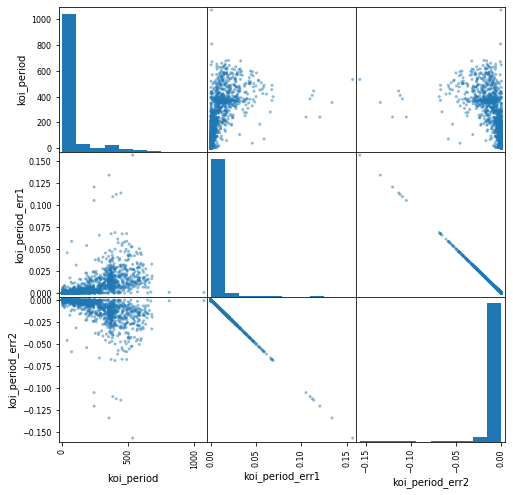

In [87]:
#Plotting a scatter matrix for one feature and its uncertainities
pd.plotting.scatter_matrix(df[["koi_period", "koi_period_err1", "koi_period_err2"]], figsize=(8, 8))

Considering the step above, we can assume that the same conclusion applies to all the features. Moreover, since the uncertainities are only related to a single feature, and it is unlikely that they have any influence on the labels, they can be eliminated.

In [88]:
# Eliminated columns that represent uncertainties
selected_features = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 
       'koi_time0bk',  'koi_impact', 'koi_duration','koi_depth', 'koi_prad', 
       'koi_teq', 'koi_insol', 
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff',  'koi_slogg', 
       'koi_srad', 'ra', 'dec',
       'koi_kepmag'
       ]]

selected_features.columns

Index(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth',
       'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_steff', 'koi_slogg', 'koi_srad', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

At this point, a correlation matrix is necessary to find all the features that are related among each other (excluding the flags which are binary). The purpose is to exclude all the features that are interrelated, before training the model.

In [89]:
#Visualize correlation matrix
display_features = selected_features[['koi_period', 
       'koi_time0bk',  'koi_impact', 'koi_duration','koi_depth', 'koi_prad', 
       'koi_teq', 'koi_insol', 
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff',  'koi_slogg', 
       'koi_srad', 'ra', 'dec',
       'koi_kepmag'
       ]]
display_features.corr()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
koi_period,1.000000,0.655186,0.067571,0.324488,-0.064272,0.072790,-0.390006,-0.021743,-0.081456,-0.022590,0.021806,-0.055410,0.017590,-0.030675,0.011226,-0.045959
koi_time0bk,0.655186,1.000000,0.055597,0.200979,-0.037195,0.039814,-0.315510,-0.021307,-0.058522,-0.006344,0.003641,-0.001929,-0.004831,-0.016981,0.010483,0.021898
koi_impact,0.067571,0.055597,1.000000,0.038594,0.001088,0.738676,-0.012648,-0.003793,-0.002429,-0.006689,0.013467,-0.073798,0.030429,0.018979,0.000357,-0.000494
koi_duration,0.324488,0.200979,0.038594,1.000000,0.072860,0.041484,-0.182678,-0.017367,0.073401,-0.011103,0.102602,-0.129763,0.016414,0.038933,-0.034985,-0.100665
koi_depth,-0.064272,-0.037195,0.001088,0.072860,1.000000,0.000740,0.076197,-0.006029,0.588988,-0.094301,0.124717,-0.010089,-0.017221,0.019420,-0.016085,0.002357
koi_prad,0.072790,0.039814,0.738676,0.041484,0.000740,1.000000,-0.003743,0.002439,-0.003568,-0.005195,-0.014998,-0.105581,0.061426,0.007930,0.003478,-0.023326
koi_teq,-0.390006,-0.315510,-0.012648,-0.182678,0.076197,-0.003743,1.000000,0.430384,0.052079,-0.082245,0.238593,-0.525108,0.450489,0.112734,-0.061653,-0.266714
koi_insol,-0.021743,-0.021307,-0.003793,-0.017367,-0.006029,0.002439,0.430384,1.000000,-0.008181,-0.008428,-0.057948,-0.280029,0.565224,0.023957,-0.016428,-0.069369
koi_model_snr,-0.081456,-0.058522,-0.002429,0.073401,0.588988,-0.003568,0.052079,-0.008181,1.000000,-0.104073,0.152426,-0.043406,-0.013017,0.029263,-0.000514,-0.130196
koi_tce_plnt_num,-0.022590,-0.006344,-0.006689,-0.011103,-0.094301,-0.005195,-0.082245,-0.008428,-0.104073,1.000000,-0.055340,0.031275,0.012990,-0.037044,0.027814,-0.051752


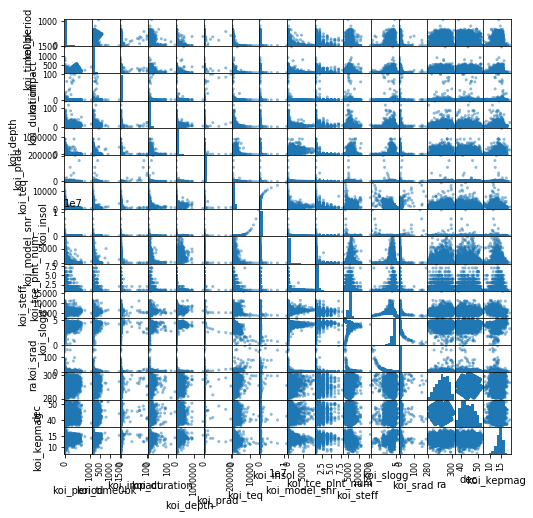

In [90]:
#visualize data
pd.plotting.scatter_matrix(display_features, figsize=(8, 8));

As it can be seen in both the scatter matrix and the correlation matrix, several features are interrelated. Eg: `koi_insol - koi_teq` and `koi_srad - koi_slogg` shown in the charts below. These will be further eliminated using a feature elimination model

Text(0.5, 1.0, 'koi_srad - koi_slogg')

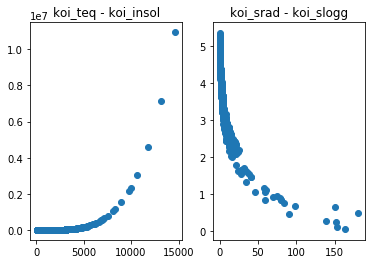

In [91]:
fig, axs = plt.subplots(1, 2)
axs[0].scatter(display_features["koi_teq"], display_features["koi_insol"])
axs[0].set_title("koi_teq - koi_insol")
axs[1].scatter(display_features["koi_srad"], display_features["koi_slogg"])
axs[1].set_title("koi_srad - koi_slogg")
#axs[2].scatter(display_features["koi_period"], display_features["koi_time0bk"])

# Create a Train Test Split

Use `koi_disposition` for the y values and transform into numerical values in order to feed the model.

In [92]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#define the variables to use to train the model
X = selected_features
#encoding the labels
le = preprocessing.LabelEncoder().fit(df['koi_disposition'])
y = le.transform(df['koi_disposition'])

In [93]:
#Dividing data into testing and training subsets, keeping the random state constant within one session
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,133.077240,0.150,3.61600,123.1,1.24,1017,253.30,10.8,1,5737,4.327,1.125,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,132.020050,0.291,2.30900,114.6,0.86,1867,2891.64,13.8,1,5855,4.578,0.797,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,134.460380,0.970,79.89690,641.1,3.21,989,226.81,254.3,1,6328,4.481,0.963,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,174.662240,0.300,2.63120,875.4,2.25,696,55.37,38.4,1,4768,4.536,0.779,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,172.258529,0.831,2.22739,9802.0,12.21,1103,349.40,696.5,1,5712,4.359,1.082,292.16705,48.727589,15.263


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection (as required).

In [94]:
# Scaling training and testing data
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [95]:
#display a sample of the scaled dataset used for training
X_train_scaled

array([[0.        , 0.        , 0.        , ..., 0.66574567, 0.17604958,
        0.64129267],
       [0.        , 1.        , 0.        , ..., 0.21268467, 0.37354005,
        0.72766344],
       [1.        , 0.        , 0.        , ..., 0.71596223, 0.15268835,
        0.5069014 ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.792823  , 0.59720043,
        0.30217373],
       [1.        , 0.        , 0.        , ..., 0.77821733, 0.29000226,
        0.52153071],
       [0.        , 0.        , 1.        , ..., 0.68082222, 0.27185353,
        0.61930738]])

Performing feature elimination, and checking that previously noticed correlations are being removed.

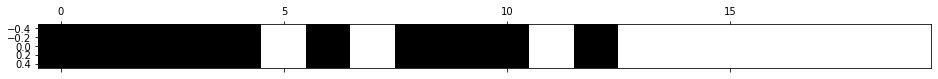

In [96]:
#Recursive feature elimination
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

#keeping only the top 10 heaviest features
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=10)
select.fit(X_train_scaled, y_train)

# visualize the selected features (black - selected features, white - eliminated features):
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [97]:
#printing the list of features that are being included (True) and the ones that are being excluded (False) 
#from the machine learning model
list(zip(selected_features.columns,mask))

[('koi_fpflag_nt', True),
 ('koi_fpflag_ss', True),
 ('koi_fpflag_co', True),
 ('koi_fpflag_ec', True),
 ('koi_period', True),
 ('koi_time0bk', False),
 ('koi_impact', True),
 ('koi_duration', False),
 ('koi_depth', True),
 ('koi_prad', True),
 ('koi_teq', True),
 ('koi_insol', False),
 ('koi_model_snr', True),
 ('koi_tce_plnt_num', False),
 ('koi_steff', False),
 ('koi_slogg', False),
 ('koi_srad', False),
 ('ra', False),
 ('dec', False),
 ('koi_kepmag', False)]

In [98]:
#assigning final values for the machine learning model
X_train_rfe = select.transform(X_train_scaled)
X_test_rfe = select.transform(X_test_scaled)

In [99]:
X_train_rfe.shape

(5243, 10)

# Train the Model and perform GridSearch



The model selected for this workbook is KNeighborsClassifier. After performing a grid search by modifying the number of neighbors, it seems that the results are beginning to stabilize at 13 neighbors, and the accuracy of the model is at about 0.85.

k: 1, Train/Test Score: 1.000/0.807
k: 3, Train/Test Score: 0.904/0.835
k: 5, Train/Test Score: 0.886/0.832
k: 7, Train/Test Score: 0.877/0.828
k: 9, Train/Test Score: 0.869/0.828
k: 11, Train/Test Score: 0.865/0.824
k: 13, Train/Test Score: 0.860/0.833
k: 15, Train/Test Score: 0.860/0.829
k: 17, Train/Test Score: 0.855/0.838
k: 19, Train/Test Score: 0.853/0.832


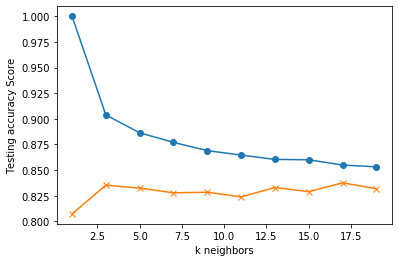

In [100]:
from sklearn.neighbors import KNeighborsClassifier

# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_rfe, y_train)
    train_score = knn.score(X_train_rfe, y_train)
    test_score = knn.score(X_test_rfe, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()


# Save the Model

In [101]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'Florin_Vasiliu.sav'
joblib.dump(knn, filename)

['Florin_Vasiliu.sav']